# READ ME FIRST PLEASE!!!

For the grader, compiling / running the program took about 15-20 minutes total on an i5 Macbook so might not want to recompile all cells. Sorry in advance! I precompiled all the solutions for the submissions so you should be able to read over each cell for the answer and not have to worry about compiling it. Thanks!

<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Jonathan Phouminh

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1402]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: Elections

# The Election of 1800
### Can we get back to politics? 

source of inspiration: https://en.wikipedia.org/wiki/1800_United_States_presidential_election

These are interesting times in United States politics. John Adams is serving as the second President, and political parties have formed the very first series of "tickets" for President and Vice President nominees. Every state has a different method of selecting electors for the Electoral College. And the idea of winning voter's hearts and minds through campaigning is becoming a pervasive idea. **The two main political parties are the Federalist and the Democratic-Republicans.**

## The Candidates

### Federalist Ticket
* John Adams - Massachusetts
* Charles Cotesworth Pinckney - South Carolina

### Democratic-Republican Ticket
* Thomas Jefferson - Virgina
* Aaron Burr - New York

## The Voters
**As observed in the data set `voters1800.csv`**

* CitizenID - an integer unique number (identifies their row in the table).
* Age - an integer representing years since birth.
* State - a string indentifying the location.
* Interest1 - a string identifying the voter's most important campaign issue.
* Interest2 - a string identifying the voter's second most important campaign issue.
* Interest3 - a string identifying the voter's third most important campaign issue.


### Part 1) A sampling of the voting population

#### Import the dataset...

Import the 'voters1800.csv' as given.

#### A) Getting to know the dataset:
Give a statistical description of the dataset you imported. Be sure to include:
* The number of voters in each State
    * The Tukey 5 Number Summary of age for voters in each state
* A description of the distribution of interests
    * Consider how to represent the distribution of first, second, and third interests
    * Consider the breakdown by state

In [1403]:
# importing the dataset
filepath = 'voters1800.csv'
df = pd.read_csv(filepath)
df.head()

# South Carolina, New York, Virginia, Massachusets, 

,CitizenID,Age,State,Interest1,Interest2,Interest3
0,0,44,Massachusets,Farming,Alcohol & Tobacco,French Revolution
1,1,49,Virginia,Economy,Alcohol & Tobacco,Democracy
2,2,36,Virginia,Religion,Economy,Farming
3,3,33,Massachusets,Family,French Revolution,Alcohol & Tobacco
4,4,52,Massachusets,Democracy,Alcohol & Tobacco,Religion


In [1404]:
# Helper methods to calculate number summary 

# Median
def computeMedian(givenArray) :
    givenArray.sort()
    if len(givenArray) % 2  == 0 : # n is even
        x1_index = (len(givenArray) // 2) - 1 
        x2_index = len(givenArray) // 2
        return ((givenArray[x1_index] + givenArray[x2_index]) / 2 , x1_index)
    else:   # n is odd
        median_index = len(givenArray) // 2
        return (givenArray[median_index], median_index)

In [1405]:
# Tukey 5 number summary : age of voters in each state 
# Minimum Value, Maximum Value, Lower Quartile, Upper Quartile , Median 

# Group all the all the data by states 
states = df.groupby('State')

# ---------------------  Massachusets --------------------- 
Mass = states.get_group('Massachusets')
M_series = Mass['Age'].values
M_medianIndex = computeMedian(M_series)[1]

# -------------- Data ------------------
M_max = Mass['Age'].max()
M_min = Mass['Age'].min()
M_median = computeMedian(M_series)[0]
M_LowerQuartile = computeMedian(M_series[0:M_medianIndex])[0]
M_UpperQuartile = computeMedian(M_series[M_medianIndex:])[0]



# --------------------- South Carolina --------------------- 
SC = states.get_group('South Carolina')
SC_series = SC['Age'].values
SC_medianIndex = computeMedian(SC_series)[1]

# -------------- Data ------------------
SC_max = SC['Age'].max()
SC_min = SC['Age'].min()
SC_median = computeMedian(SC_series)[0]
SC_LowerQuartile = computeMedian(SC_series[0:SC_medianIndex])[0]
SC_UpperQuartile = computeMedian(SC_series[SC_medianIndex:])[0]


# --------------------- Virginia --------------------- 
Vir = states.get_group('Virginia')
Vir_series = Vir['Age'].values
Vir_medianIndex = computeMedian(Vir_series)[1]


# -------------- Data ------------------
Vir_max = Vir['Age'].max()
Vir_min = Vir['Age'].min()
Vir_median = computeMedian(Vir_series)[0]
Vir_LowerQuartile = computeMedian(Vir_series[0:SC_medianIndex])[0]
Vir_UpperQuartile = computeMedian(Vir_series[SC_medianIndex:])[0]

# --------------------- New York --------------------- 
NY = states.get_group('New York')
NY_series = NY['Age'].values
NY_medianIndex = computeMedian(NY_series)[1]

# -------------- Data ------------------
NY_max = NY['Age'].max()
NY_min = NY['Age'].min()
NY_median = computeMedian(NY_series)[0]
NY_LowerQuartile = computeMedian(NY_series[0:NY_medianIndex])[0]
NY_UpperQuartile = computeMedian(NY_series[NY_medianIndex:])[0]




In [1406]:
def printSummary(minvalue, lowerq, median, upperq, maxvalue):
    print("---- Tukey Summary ----")
    print("Minimum: ", minvalue);
    print("Q1: ", lowerq)
    print("Median: ", median)
    print("Q3: ", upperq)
    print("Maximum: ", maxvalue)
    print()
    print()
    
print("Massachusets")
printSummary(M_min, M_LowerQuartile, M_median, M_UpperQuartile, M_max)
print("South Carolina")
printSummary(SC_min, SC_LowerQuartile, SC_median, SC_UpperQuartile, SC_max)
print("New York")
printSummary(NY_min, NY_LowerQuartile, NY_median, NY_UpperQuartile, NY_max)
print("Virginia")
printSummary(Vir_min, Vir_LowerQuartile, Vir_median, Vir_UpperQuartile, Vir_max)
    
    

Massachusets
---- Tukey Summary ----
Minimum:  18
Q1:  32.0
Median:  50.0
Q3:  67.0
Maximum:  79


South Carolina
---- Tukey Summary ----
Minimum:  18
Q1:  33
Median:  52
Q3:  67.0
Maximum:  80


New York
---- Tukey Summary ----
Minimum:  18
Q1:  36
Median:  48.0
Q3:  63
Maximum:  79


Virginia
---- Tukey Summary ----
Minimum:  18
Q1:  33
Median:  49
Q3:  64.5
Maximum:  80




Will describe the distributions of each state by accumulating the amount of voters who labeled each interest based on priority for all 4 states. Then will discuss the nuances of what voters most value / devalue for interest1 , interest2, and interest3 for each state
   

In [1407]:
# ------- Massachusets Data ----------
M1_Alc = Mass.query('Interest1 == "Alcohol & Tobacco"').Interest1.count()
M1_Demo = Mass.query('Interest1 == "Democracy"').Interest1.count()
M1_Econ = Mass.query('Interest1 == "Economy"').Interest1.count()
M1_Family = Mass.query('Interest1 == "Family"').Interest1.count()
M1_Farming = Mass.query('Interest1 == "Farming"').Interest1.count()
M1_French = Mass.query('Interest1 == "French Revolution"').Interest1.count()
M1_Religion = Mass.query('Interest1 == "Religion"').Interest1.count()

M2_Alc = Mass.query('Interest2 == "Alcohol & Tobacco"').Interest2.count()
M2_Demo = Mass.query('Interest2 == "Democracy"').Interest2.count()
M2_Econ = Mass.query('Interest2 == "Economy"').Interest2.count()
M2_Family = Mass.query('Interest2 == "Family"').Interest2.count()
M2_Farming = Mass.query('Interest2 == "Farming"').Interest2.count()
M2_French = Mass.query('Interest2 == "French Revolution"').Interest2.count()
M2_Religion = Mass.query('Interest2 == "Religion"').Interest2.count()

M3_Alc = Mass.query('Interest3 == "Alcohol & Tobacco"').Interest3.count()
M3_Demo = Mass.query('Interest3 == "Democracy"').Interest3.count()
M3_Econ = Mass.query('Interest3 == "Economy"').Interest3.count()
M3_Family = Mass.query('Interest3 == "Family"').Interest3.count()
M3_Farming = Mass.query('Interest3 == "Farming"').Interest3.count()
M3_French = Mass.query('Interest3 == "French Revolution"').Interest3.count()
M3_Religion = Mass.query('Interest3 == "Religion"').Interest3.count()


# ------- South Carolina Data -------
SC1_Alc = SC.query('Interest1 == "Alcohol & Tobacco"').Interest1.count()
SC1_Demo = SC.query('Interest1 == "Democracy"').Interest1.count()
SC1_Econ = SC.query('Interest1 == "Economy"').Interest1.count()
SC1_Family = SC.query('Interest1 == "Family"').Interest1.count()
SC1_Farming = SC.query('Interest1 == "Farming"').Interest1.count()
SC1_French = SC.query('Interest1 == "French Revolution"').Interest1.count()
SC1_Religion = SC.query('Interest1 == "Religion"').Interest1.count()

SC2_Alc = SC.query('Interest2 == "Alcohol & Tobacco"').Interest2.count()
SC2_Demo = SC.query('Interest2 == "Democracy"').Interest2.count()
SC2_Econ = SC.query('Interest2 == "Economy"').Interest2.count()
SC2_Family = SC.query('Interest2 == "Family"').Interest2.count()
SC2_Farming = SC.query('Interest2 == "Farming"').Interest2.count()
SC2_French = SC.query('Interest2 == "French Revolution"').Interest2.count()
SC2_Religion = SC.query('Interest2 == "Religion"').Interest2.count()


SC3_Alc = SC.query('Interest3 == "Alcohol & Tobacco"').Interest3.count()
SC3_Demo = SC.query('Interest3 == "Democracy"').Interest3.count()
SC3_Econ = SC.query('Interest3 == "Economy"').Interest3.count()
SC3_Family = SC.query('Interest3 == "Family"').Interest3.count()
SC3_Farming = SC.query('Interest3 == "Farming"').Interest3.count()
SC3_French = SC.query('Interest3 == "French Revolution"').Interest3.count()
SC3_Religion = SC.query('Interest3 == "Religion"').Interest3.count()

# ------- Virginia Data -------

Vir1_Alc = Vir.query('Interest1 == "Alcohol & Tobacco"').Interest1.count()
Vir1_Demo = Vir.query('Interest1 == "Democracy"').Interest1.count()
Vir1_Econ = Vir.query('Interest1 == "Economy"').Interest1.count()
Vir1_Family = Vir.query('Interest1 == "Family"').Interest1.count()
Vir1_Farming = Vir.query('Interest1 == "Farming"').Interest1.count()
Vir1_French = Vir.query('Interest1 == "French Revolution"').Interest1.count()
Vir1_Religion = Vir.query('Interest1 == "Religion"').Interest1.count()

Vir2_Alc = Vir.query('Interest2 == "Alcohol & Tobacco"').Interest2.count()
Vir2_Demo = Vir.query('Interest2 == "Democracy"').Interest2.count()
Vir2_Econ = Vir.query('Interest2 == "Economy"').Interest2.count()
Vir2_Family = Vir.query('Interest2 == "Family"').Interest2.count()
Vir2_Farming = Vir.query('Interest2 == "Farming"').Interest2.count()
Vir2_French = Vir.query('Interest2 == "French Revolution"').Interest2.count()
Vir2_Religion = Vir.query('Interest2 == "Religion"').Interest2.count()

Vir3_Alc = Vir.query('Interest3 == "Alcohol & Tobacco"').Interest3.count()
Vir3_Demo = Vir.query('Interest3 == "Democracy"').Interest3.count()
Vir3_Econ = Vir.query('Interest3 == "Economy"').Interest3.count()
Vir3_Family = Vir.query('Interest3 == "Family"').Interest3.count()
Vir3_Farming = Vir.query('Interest3 == "Farming"').Interest3.count()
Vir3_French = Vir.query('Interest3 == "French Revolution"').Interest3.count()
Vir3_Religion = Vir.query('Interest3 == "Religion"').Interest3.count()

# ------- New York Data -------

NY1_Alc = NY.query('Interest1 == "Alcohol & Tobacco"').Interest1.count()
NY1_Demo = NY.query('Interest1 == "Democracy"').Interest1.count()
NY1_Econ = NY.query('Interest1 == "Economy"').Interest1.count()
NY1_Family = NY.query('Interest1 == "Family"').Interest1.count()
NY1_Farming = NY.query('Interest1 == "Farming"').Interest1.count()
NY1_French = NY.query('Interest1 == "French Revolution"').Interest1.count()
NY1_Religion = NY.query('Interest1 == "Religion"').Interest1.count()

NY2_Alc = NY.query('Interest2 == "Alcohol & Tobacco"').Interest2.count()
NY2_Demo = NY.query('Interest2 == "Democracy"').Interest2.count()
NY2_Econ = NY.query('Interest2 == "Economy"').Interest2.count()
NY2_Family = NY.query('Interest2 == "Family"').Interest2.count()
NY2_Farming = NY.query('Interest2 == "Farming"').Interest2.count()
NY2_French = NY.query('Interest2 == "French Revolution"').Interest2.count()
NY2_Religion = NY.query('Interest2 == "Religion"').Interest2.count()

NY3_Alc = NY.query('Interest3 == "Alcohol & Tobacco"').Interest3.count()
NY3_Demo = NY.query('Interest3 == "Democracy"').Interest3.count()
NY3_Econ = NY.query('Interest3 == "Economy"').Interest3.count()
NY3_Family = NY.query('Interest3 == "Family"').Interest3.count()
NY3_Farming = NY.query('Interest3 == "Farming"').Interest3.count()
NY3_French = NY.query('Interest3 == "French Revolution"').Interest3.count()
NY3_Religion = NY.query('Interest3 == "Religion"').Interest3.count()


In [1408]:
# Massachusets Summary 
M_TOTAL_VOTERS = len(Mass)
print("Massachusets   Total Voters: ", M_TOTAL_VOTERS)
print("----Interest1----")
print("Alcohol & Tobacco: ", math.ceil((M1_Alc / M_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((M1_Demo / M_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((M1_Econ / M_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((M1_Family / M_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((M1_Farming / M_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((M1_French / M_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((M1_Religion / M_TOTAL_VOTERS)*100), "%")
print()

print("----Interest2----")
print("Alcohol & Tobacco: ", math.ceil((M2_Alc / M_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((M2_Demo / M_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((M2_Econ / M_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((M2_Family / M_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((M2_Farming / M_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((M2_French / M_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((M2_Religion / M_TOTAL_VOTERS)*100), "%")
print()


print("----Interest3----")
print("Alcohol & Tobacco: ", math.ceil((M3_Alc / M_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((M3_Demo / M_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((M3_Econ / M_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((M3_Family / M_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((M3_Farming / M_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((M3_French / M_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((M3_Religion / M_TOTAL_VOTERS)*100), "%")
print()
print()



Massachusets   Total Voters:  230
----Interest1----
Alcohol & Tobacco:  14 %
Democracy:  15 %
Economy:  9 %
Family:  17 %
Farming:  16 %
French Revolution:  15 %
Religion:  16 %

----Interest2----
Alcohol & Tobacco:  19 %
Democracy:  16 %
Economy:  13 %
Family:  16 %
Farming:  14 %
French Revolution:  15 %
Religion:  11 %

----Interest3----
Alcohol & Tobacco:  17 %
Democracy:  8 %
Economy:  17 %
Family:  15 %
Farming:  15 %
French Revolution:  13 %
Religion:  18 %




**Analyzing Massachusets**

Interest1:  Looking at interest1, it seems that that the data is distributed fairly evenly for all topics other than the economy. So economy must not be a high priority for voters.

Interest2:  Looking at interest2, the data is not as evenly distributed as interest1 and we see the Alcohol & Tobacco has most of the data distribution

Interest3:  Looking at interest3, we see the data is distributed similarly as interest1, but in this case Democracy isn't the highest priority for voters 3rd interest.

In [1409]:
# South Carolina 
SC_TOTAL_VOTERS = len(SC)
print("South Carolina   Total Voters: ", SC_TOTAL_VOTERS)
print("----Interest1----")
print("Alcohol & Tobacco: ", math.ceil((SC1_Alc / SC_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((SC1_Demo / SC_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((SC1_Econ / SC_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((SC1_Family / SC_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((SC1_Farming / SC_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((SC1_French / SC_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((SC1_Religion / SC_TOTAL_VOTERS)*100), "%")
print()

print("----Interest2----")
print("Alcohol & Tobacco: ", math.ceil((SC2_Alc / SC_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((SC2_Demo / SC_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((SC2_Econ / SC_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((SC2_Family / SC_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((SC2_Farming / SC_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((SC2_French / SC_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((SC2_Religion / SC_TOTAL_VOTERS)*100), "%")
print()

print("----Interest3----")
print("Alcohol & Tobacco: ", math.ceil((SC3_Alc / SC_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((SC3_Demo / SC_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((SC3_Econ / SC_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((SC3_Family / SC_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((SC3_Farming / SC_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((SC3_French / SC_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((SC3_Religion / SC_TOTAL_VOTERS)*100), "%")
print()
print()

South Carolina   Total Voters:  231
----Interest1----
Alcohol & Tobacco:  13 %
Democracy:  16 %
Economy:  16 %
Family:  12 %
Farming:  13 %
French Revolution:  17 %
Religion:  17 %

----Interest2----
Alcohol & Tobacco:  14 %
Democracy:  15 %
Economy:  14 %
Family:  11 %
Farming:  14 %
French Revolution:  19 %
Religion:  15 %

----Interest3----
Alcohol & Tobacco:  15 %
Democracy:  17 %
Economy:  16 %
Family:  13 %
Farming:  15 %
French Revolution:  12 %
Religion:  15 %




**Analyzing South Carolina**

Interest1:  Looking at interest1, we see the the bulk of the distribution is leaning towards 'French Revolution', 'Religion', 'Family', and 'Farming'.

Interest2:  Looking at interest2, We see the data is distributed fairly evenly for all topics apart from 'French Revolution' which carries 3-4% more of the data 

Interest3:  Looking at interest3, the data is also distributed evenly for all except for 'Democracy' and 'Economy'

In [1410]:

# Virginia
V_TOTAL_VOTERS = len(Vir)
print("Virginia    Total Voters: ", V_TOTAL_VOTERS)
print("----Interest1----")
print("Alcohol & Tobacco: ", math.ceil((Vir1_Alc / V_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((Vir1_Demo / V_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((Vir1_Econ / V_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((Vir1_Family / V_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((Vir1_Farming / V_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((Vir1_French / V_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((Vir1_Religion / V_TOTAL_VOTERS)*100), "%")
print()

print("----Interest2----")
print("Alcohol & Tobacco: ", math.ceil((Vir2_Alc / V_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((Vir2_Demo / V_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((Vir2_Econ / V_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((Vir2_Family / V_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((Vir2_Farming / V_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((Vir2_French / V_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((Vir2_Religion / V_TOTAL_VOTERS)*100), "%")
print()


print("----Interest3----")
print("Alcohol & Tobacco: ", math.ceil((Vir3_Alc / V_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((Vir3_Demo / V_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((Vir3_Econ / V_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((Vir3_Family / V_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((Vir3_Farming / V_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((Vir3_French / V_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((Vir3_Religion / V_TOTAL_VOTERS)*100), "%")
print()
print()

Virginia    Total Voters:  231
----Interest1----
Alcohol & Tobacco:  10 %
Democracy:  17 %
Economy:  14 %
Family:  16 %
Farming:  18 %
French Revolution:  17 %
Religion:  11 %

----Interest2----
Alcohol & Tobacco:  18 %
Democracy:  13 %
Economy:  18 %
Family:  18 %
Farming:  12 %
French Revolution:  9 %
Religion:  15 %

----Interest3----
Alcohol & Tobacco:  15 %
Democracy:  16 %
Economy:  13 %
Family:  11 %
Farming:  17 %
French Revolution:  18 %
Religion:  14 %




**Analyzing Virginia**

Interest1:  Looking at interest1, the data is not evenly distributed as we see a steady increase of voter interest in the order of **Alcohol & Tobacco -> Religion -> Economy -> Family -> Democracy -> Farming**

Interest2:  Looking at interest2, a good portion of the data is distributed into **Economy / Family / Alcohol and Tobacco**. 

Interest3:  Looking at interest3, the data was distributed similary to interest1 where we saw the data distribution rising for each topic. **Family -> Economy -> Religion -> Alcohol & Tobacco -> Democracy -> Farming -> French Revolution**

In [1411]:
# New York
NY_TOTAL_VOTERS = len(NY)
print("New York      New York: ", NY_TOTAL_VOTERS)
print("----Interest1----")
print("Alcohol & Tobacco: ", math.ceil((NY1_Alc / NY_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((NY1_Demo / NY_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((NY1_Econ / NY_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((NY1_Family / NY_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((NY1_Farming / NY_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((NY1_French / NY_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((NY1_Religion / NY_TOTAL_VOTERS)*100), "%")
print()

print("----Interest2----")
print("Alcohol & Tobacco: ", math.ceil((NY2_Alc / NY_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((NY2_Demo / NY_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((NY2_Econ / NY_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((NY2_Family / NY_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((NY2_Farming / NY_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((NY2_French / NY_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((NY2_Religion / NY_TOTAL_VOTERS)*100), "%")
print()

print("----Interest3----")
print("Alcohol & Tobacco: ", math.ceil((NY3_Alc / NY_TOTAL_VOTERS)*100), "%")
print("Democracy: ", math.ceil((NY3_Demo / NY_TOTAL_VOTERS)*100), "%")
print("Economy: ", math.ceil((NY3_Econ / NY_TOTAL_VOTERS)*100), "%")
print("Family: ", math.ceil((NY3_Family / NY_TOTAL_VOTERS)*100), "%")
print("Farming: ", math.ceil((NY3_Farming / NY_TOTAL_VOTERS)*100), "%")
print("French Revolution: ", math.ceil((NY3_French / NY_TOTAL_VOTERS)*100), "%")
print("Religion: ", math.ceil((NY3_Religion / NY_TOTAL_VOTERS)*100), "%")
print()

New York      New York:  240
----Interest1----
Alcohol & Tobacco:  15 %
Democracy:  15 %
Economy:  13 %
Family:  15 %
Farming:  16 %
French Revolution:  12 %
Religion:  17 %

----Interest2----
Alcohol & Tobacco:  13 %
Democracy:  16 %
Economy:  17 %
Family:  15 %
Farming:  13 %
French Revolution:  12 %
Religion:  17 %

----Interest3----
Alcohol & Tobacco:  15 %
Democracy:  13 %
Economy:  16 %
Family:  11 %
Farming:  15 %
French Revolution:  18 %
Religion:  15 %



**Analyzing New York**

Interest1:  Looking at interest1, the data was distributed fairly evenly, but **Religion** being the most voted on by a little bit.

Interest2:  Looking at interest2, it seems that **Economy / Religion ** held the most of the data for interest2 as they were the 2 most voted on topics

Interest3:  Looking at interest3, the data is distributed faily evenly except **French Revolution** carries about 3% more of the data then the rest of the topics.

#### B) Model  baseline voting expecations 
Now that we have a pool of voters, let's model the baseline expectations for a vote.

For clarification, the Electoral College is a part of the process by which the United States votes for the president and vice-president. Each state has a certain number of "electoral votes" based on their populations (states with lower populations have less votes: today, states like Wyoming and Montana have 3 electoral college votes, while California has 55 electoral college votes because it is the state with the highest population) and these votes are cast based on the popular vote - how many voters voted for each politician. In some states, the electoral vote is decided by state-wide plurality - whoever gets the most votes in the entire state gets all of the electoral college votes (winner-take-all). In other states, each electoral college vote is associated with a electoral district and whoever has the most votes in each district takes that point. Though some details have changed, the electoral college operates in much the same way today as it did back in 1800!

Given the following assumptions:

* Each voter makes their decision independently of other voters


* With no other information, each voter is equally likely to vote for one party or the other
    * : i.e. P(Federalist) = P(Democratic-Republican)
   
   
* If a voter is from the same state as one of the presidential nominees, there is an additional **0.1** likelihood that they will vote for that nominee's party 
    * * i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
    
    
* If a voter is from the same states as one of the vice-presidental nominees, there is an additional **0.05** likelihood that they will vote for that nominee's party.


* Each state is responsible for a different number of Electoral College votes: 
    * Massachusetts has **16 votes**, and is split by electoral districts
        * Assume an even split among voters 
    * New York has **12 votes** and is Winner-Take-All
    * Virginia has **21 votes** and is split by electoral districts
        * Assume an even split among voters
    * South Carolina has **8 votes** and is Winner-Take-All
    
NOTE: South Carolina delegates were actually chosen by the state legislature, but that doesn't allow us to create such an interesting problem!

What is the expected outcome for an election in these four states? How many electoral college votes will each party ticket receive?

**Presidents**: <br>
John Adams:   Mass Federalist <br>
Thomas Jefferson:   Virginia D-R  <br>

**Vice Presidents:** <br>
Charles P:   SC  Federalist  <br>
Aaron Burr:  New York Demo   <br>

In [1412]:
# defining a map for states representatives
prez = { "Virginia" : "ThomasJefferson", "Massachusets" : "JohnAdams" }
vp = { "New York" : "AaronBurr", "South Carolina": "CharlesP" }

In [1413]:
# calculates binomial probability for 'successes'
def calculateBinomial(pfeds, trials, successes):
    c = math.factorial(trials) /  (math.factorial(trials - successes) * math.factorial(successes))
    a = math.pow(pfeds, successes)
    b = math.pow(1-pfeds, trials - successes)
    return a * b * c


# Calculates p(federalist),  at the end the p(D-R) is just 1 - p(feds)
def probCandidateFeds(homeState):
    # the base probability is 50/50 between feds and DR
    p_feds = 1/2
    if homeState in prez:
        if (prez[homeState] == "JohnAdams"):
            p_feds = p_feds + (1/1000)

    if homeState in vp:
        if (vp[homeState] == "CharlesP"):
            p_feds = p_feds + (5/10000)
    return p_feds


# Calculates p(federalist),  at the end the p(D-R) is just 1 - p(feds)
def probCandidateDR(homeState):
    # the base probability is 50/50 between feds and DR
    p_dr = 1/2
    if homeState in prez:
        if (prez[homeState] == "ThomasJefferson"):
            p_dr = p_dr + (1/1000)

    if homeState in vp:
        if (vp[homeState] == "AaronBurr"):
            p_dr = p_dr + (5/1000)
    return p_dr



# finds the probability of a federalist winning any given district
# "What is the probability of a federalist getting AT LEAST 'votesNeeded'" 
# calculate the binomial for random variable X the sum it up
def probWinsDistrict(Prob, voterCount): # binomial
    prob = [] # sum this up at the end
    
    # divide the amount of voters by 2, then + 1 because then they win the popular vote
    votesNeeded = voterCount // 2 + 1
    for i in range(votesNeeded, voterCount+1):
        prob.append(calculateBinomial(Prob, voterCount, i))
    
    probWinningDistrict = sum(prob)
    return probWinningDistrict


# calculates the expected amount of electoral votes we should expect 
def getExpectedOutcome1(districtWinRate, districtCount):
    
    # generate pdf
    pdf = []
    
    for i in range(1,districtCount+1):
        pdf.append(calculateBinomial(districtWinRate, districtCount, i))
        
    # calculuate expected outcome using discrete formula
    expectation = 0
    j = 1
    for district in pdf:
        expectation = expectation + (j * district)
        j = j + 1
    return expectation

In [1414]:
# ------ Massachusets Calculation ------
M_TOTAL_VOTERS = len(Mass)
M_VOTERS_PER_DISTRICT = M_TOTAL_VOTERS // 16 
M_Fed = "Massachusets"  # probability of them voting federalist 

# calcuating federalist expected votes
M_pfeds = probCandidateFeds(M_Fed)  # probability of winning a district
M_pfedDistrict = probWinsDistrict(M_pfeds, M_VOTERS_PER_DISTRICT) # probabiliy of winning a district 
M_fedElectoralVotes = getExpectedOutcome1(M_pfedDistrict, 16) # 16 districts 
print("Federalist should expect at least ", M_fedElectoralVotes, " electoral votes in Massachusets.")


# calculating D-R expected votes
M_pdr = 1 - M_pfeds  # probability of someone in massachusets voting D-R
M_pdrDistrict = probWinsDistrict(M_pdr, M_VOTERS_PER_DISTRICT)
M_pdrElectoralVotes = getExpectedOutcome1(M_pdrDistrict, 16)
print("D-R should get at least", M_pdrElectoralVotes, " electoral votes in Massachusets.")
print("Federalist should win Massachusets state.")


Federalist should expect at least  6.3711871709392005  electoral votes in Massachusets.
D-R should get at least 6.277344171684681  electoral votes in Massachusets.
Federalist should win Massachusets state.


In [1415]:
# ------ Virginia Calculation ------
V_TOTAL_VOTERS = len(Vir)
V_VOTERS_PER_DISTRICT = V_TOTAL_VOTERS // 21
V_Fed = "Virginia"


# calcuating D-R expected votes
V_pdr = probCandidateDR(V_Fed)
V_pdrDistrict = probWinsDistrict(V_pdr, V_VOTERS_PER_DISTRICT)
V_pdrElectoralVotes = getExpectedOutcome1(V_pdrDistrict, 21)

# calculating federalist expected votes 
V_pfeds = 1 - V_pdr
V_pfedDistrict = probWinsDistrict(V_pfeds, V_VOTERS_PER_DISTRICT)
V_fedElectoralVotes = getExpectedOutcome1(V_pfedDistrict, 21)



print("Federalist should expect at least ", V_fedElectoralVotes, " electoral votes in Virginia.")
print("D-R should get at least", V_pdrElectoralVotes, " electoral votes in Virginia.")
print("D-R should win Virginia.")

Federalist should expect at least  10.443152722732567  electoral votes in Virginia.
D-R should get at least 10.556847277267446  electoral votes in Virginia.
D-R should win Virginia.


In [1416]:
# ------ SC Calculation ------
SC_TOTAL_VOTERS = len(SC)
SC_VOTERS_PER_DISTRICT = SC_TOTAL_VOTERS // 8
SC_fed = "South Carolina"

# calculating federalist expected votes
SC_pfeds = probCandidateFeds(SC_fed)
SC_pdrDistrict = probWinsDistrict(SC_pfeds, SC_VOTERS_PER_DISTRICT)
SC_fedElectoralVotes = getExpectedOutcome1(SC_pdrDistrict, 8)


# calculating D-R expected votes
SC_pdr = 1 - SC_pfeds
SC_pfedDistrict = probWinsDistrict(SC_pdr, SC_VOTERS_PER_DISTRICT)
SC_drElectoralVotes = getExpectedOutcome1(SC_pfedDistrict, 8)


print("Federalist should expect at least ", SC_fedElectoralVotes, " electoral votes in SC.")
print("D-R should expect at least ", SC_drElectoralVotes, " electoral votes in SC.")
print("Federalist should win this state and recieve all 8 votes")

Federalist should expect at least  3.4189623230887363  electoral votes in SC.
D-R should expect at least  3.3854865684541005  electoral votes in SC.
Federalist should win this state and recieve all 8 votes


In [1417]:
# Should be similar, but for expected outcome we need to figure out the winner take all case.
# Should be able to determine who wins by constructing the pdf, seeing and seeings who expected value 
# is greater then the ones whos value is greater is the one to win the state 
# ------ NY Calculation ------
NY_TOTAL_VOTERS = len(NY)
NY_VOTERS_PER_DISTRICT = NY_TOTAL_VOTERS // 12
NY_dr = "New York"

# calculating D-R expected votes 
NY_pdr = probCandidateDR(NY_dr)
NY_pdrDistrict = probWinsDistrict(NY_pdr, NY_VOTERS_PER_DISTRICT)
NY_drElectoralVotes = getExpectedOutcome1(NY_pdrDistrict, 12)


# calculating federalist expected votes
NY_pfed = 1 - NY_pdr
NY_pfedDistrict = probFedWinsDistrict(NY_pfed, NY_VOTERS_PER_DISTRICT)
NY_fedElectoralVotes = getExpectedOutcome1(NY_pfedDistrict, 12)

print("Federalist should expect at least ", NY_fedElectoralVotes, " electoral votes in NY.")
print("D-R should expect at least ", NY_drElectoralVotes, " electoral votes in NY.")
print("D-R should win this state and recieve all 12 votes")

Federalist should expect at least  4.732501348010579  electoral votes in NY.
D-R should expect at least  5.155247441379604  electoral votes in NY.
D-R should win this state and recieve all 12 votes


#### C) Electioneering
Of course, this election was really the first one with full-fledged political campaigns, attempting to sway voters with rhetoric and communication. You will play the role of the press secretary for a campaign, leading these efforts. Let's set up a series of rules for how you can influence the election:

* **You can only write one article per day.** Each article can only **cover one Interest**, and can only be **run in one State**. You have to tailor what you write to that population!


* Running a piece in a newspaper will appease voters in that state...
    * If the article is about a voter's **number 1 interest**, it adds **0.3** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 2 interest**, it adds **0.2** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 3 interest**, it adds **0.1** to the likelihood they will vote for your party.
    * If the article is about something a voter has **no interest** in, it only adds **0.02** to the likelihood they will vote for your party, because you are focusing on their state.
    
    
* Running a piece in a newspaper will also dissatisfy voters in other states...
    * The voters in other states will **lose 0.01** to the probability that they will vote for your party, because you are ignoring them.
    
    
* Some topics are big in certain areas!
    * No matter which newspaper you're writing in, news of articles about **Farming** will trickle down to the South (**Virginia and South Carolina**) and will **add 0.02** to the likelihood all voters there will vote for your party.   
    * No matter which newspaper you're writing in, news of articles about the **Economy** will trickle down to the North (**New York and Massachusetts**) and will **add 0.02** to the likelihood all voters there will vote for your party.
    
    
* Some topics are big with certain demographics!
    * No matter a voter's listed interests, writing about the **French Revolution** will **add .05** to the likelihood for **all voters Age 30** or under in any Region (North or South).
    
    * No matter a voter's listed interests, writing about **Alcohol & Tobacco** will **add 0.05** to the likelihood for **all voters Age 60 or above** in any Region (North or South).
    
#### Designing your Campaign Strategy
* You have 30 days to maximize your gains and try to win the election. What is your strategy if
    * you are the Democratic-Republican Ticket?
    * you are the Federalist Ticket?
* Do you manage to win, considering your opponent does nothing?
@* Assume that if you somehow manage to add 50 or more likelihood to a single voter  (from 50%), then their P(vote) stops at 100%.

In [1418]:
             #            These next 2 cells are just notes i made to myself when figuring out strategy

# 30 day simulation 
# one article per day, only one state per time 


# if you campaign and don't hit an interest then they only increase 0.02 % 
# not advertising in a state results in a loss of 0.01% that all other people in the state will vote for you party

# Special Interests
#  if you campaign about Farming in any state, all voters from Virginia and SC will vote for your party by + 0.02%
#  if you discuss Economy then all voters from New York and Massachusets will go up by + 0.02%

#  if you write about French Revolution it will be + 0.05% for all voters who are <=30 age 
#  if you write about Alcohol and Tobacco then + 0.05% for all voters 60 and above 

# if anybody p(vote) == 100 then do nothing for them anymore because they are guarenteed to vote for you 

# you have to create a strategy for Federalist and D-R
# -----------------------------------------------------------------------------

# look in the data frame and determine the following
# - largest age demographic:  <= 30  or <= 50
# - the count of all types of interests so you can figure out which ones to lean on , you want
# to hit the special interests as much as possible. 

# Seeing the age demographic for all states 
youngerVoters = df[df['Age'] <= 30]
olderVotesr = df[df['Age'] >= 60]

# If you are in a state that has high interest1 and interest2 in alcohol then advertise alcohol 
# If you are in a state that has high interest in french revolution then advertise french revolution

# ---- How to pick what interest you want to advertise ----- 
# Reference the 1a to see what interests you want to target for each state depending on Fed or DR strat
# talk about Farming when you are in New York or Mass so that you hit SC and Virginia
# talk about Economy if you advertise in Virginia or SC so you hit NY and Mass


In [1419]:
# --------------------------------- Notes ------------------------------------------------
'''
    741 people over 30 
    191 people 30 or under                
        Go ahead and attract as many older voters for either party because there is a ton
        
'''
# --------------------------------- Democrat/Republican Strategy------------------------------------------------
'''
     Everybody located in New York or Virginia Automatically benefit
         - Virginia: + (1/1000) more probability of voting DR
         - New York: + (5/1000) more probability of voting DR
     focus on winning Massachusets and South Carolina
         - Talk about farming if you are in Massachusets to balance loss in SC
         - Talk about the french revolution in South Carolina
         
         Keep your home state voters interested
         - do 8 days of advertsing alchol and tobacco
         - do 8 days of advertsing family 
         - the rest just split between the ads for mass and SC
'''
# --------------------------------- Federalist ------------------------------------------------
'''
    Everybody located in South Carolina or Massachusets Automatically benefit
        - Massachusets: + (1/1000)
        - South Carolina: + (5/1000)
    focus on winning New York and Virginia
        - exploit winning virgina by talking a lot about Alcohol and tobacco
        - Also exploit New York by talking a lot about Alcohol and tobacco because its a high interest2 and
        median for interest 1. This is good too because there are a lot of older voters
'''

'\n    Everybody located in South Carolina or Massachusets Automatically benefit\n        - Massachusets: + (1/1000)\n        - South Carolina: + (5/1000)\n    focus on winning New York and Virginia\n        - exploit winning virgina by talking a lot about Alcohol and tobacco\n        - Also exploit New York by talking a lot about Alcohol and tobacco because its a high interest2 and\n        median for interest 1. This is good too because there are a lot of older voters\n'

In [1420]:
# create 2 dataframes that mirror the original
# - one that has column for p(federalist) and one for p(D-R)
# loop through the data frame and update values accordingly? 
voteProbColumn = []
for i in range(len(df)):
    voteProbColumn.append(1/2)

In [1421]:
pd.options.mode.chained_assignment = None
# adding columns
dfFeds = df.copy()
dfFeds['probFeds'] = voteProbColumn

dfDR = df.copy()
dfDR['probDR'] = voteProbColumn

In [1422]:
#Everybody located in South Carolina or Massachusets Automatically benefit
#        - Massachusets: + (1/1000)
#        - South Carolina: + (5/1000)
#    focus on winning New York and Virginia
#        - exploit winning virgina by talking a lot about Alcohol and tobacco
#        - Also exploit New York by talking a lot about Alcohol and tobacco because its a high interest2 and
#        median for interest 1. This is good too because there are a lot of older voters
#Keep your home state voters interested
#         - do 8 days of french revolution : South Carolina
#         - do 8 days of advertsing family : Massachusets
#         - the rest just split between the ads for mass and SC


# Holds my daily plan for advertising
state = []
advertisements = []

def loadStrategyFeds():
    # home state ads
    for i in range(8):
        state.append("South Carolina")
        state.append("Massachusets")
        advertisements.append("French Revolution")
        advertisements.append("Family")
    
    # out of state ads
    for i in range(7):
        state.append("New York")
        state.append("Virginia")
        advertisements.append("Alcohol & Tobacco")
        advertisements.append("Alcohol & Tobacco")
    
        
def resetData():
    # give all the home state voters extra probability
    for row in dfFeds.index:
        if(dfFeds.State[row] == "Massachusets"):
            dfFeds.probFeds[row] = 0.501
        elif(dfFeds.State[row] == "South Carolina"):
            dfFeds.probFeds[row] = 0.5005
        else:
            dfFeds.probFeds[row] = 0.5
            
def advertiseFederalist():
    for i in range(len(state)):
        print(i) # prints the current day of advertisement
        currState = state[i]
        currInterestAd = advertisements[i]
        for row in dfFeds.index:
            citizenState = dfFeds.State[row]
            citizenAge = dfFeds.Age[row]
            citizenInterests = [dfFeds.Interest1[row], dfFeds.Interest2[row], dfFeds.Interest3[row]]
            pVoteFeds = dfFeds.probFeds[row]
            
            # Special Interests
            #  if you campaign about Farming in any state, all voters from Virginia and SC will vote for your party 
            #  by + 0.002%
            if currInterestAd == "Farming":
                for row2 in dfFeds.index:
                    currCitzState = dfFeds.State[row2]
                    if currCitzState == "Virginia" or currCitzState == "South Carolina" and dfFeds.probFeds[row2] <= 1.0:
                        dfFeds.probFeds[row2] = dfFeds.probFeds[row2] + 0.002
            
            #  if you discuss Economy then all voters from New York and Massachusets will go up by + 0.002%
            elif currInterestAd == "Economy":
                for row3 in dfFeds.index:
                    currCitzState = dfFeds.State[row3]
                    if currCitzState == "New York" or currCitzState == "Massachusets" and dfFeds.probFeds[row3] <= 1.0:
                        dfFeds.probFeds[row3] = dfFeds.probFeds[row3] + 0.002
            #  if you write about French Revolution it will be + 0.005% for all voters who are <=30 age
            if currInterestAd == "French Revolution":
                for row4 in dfFeds.index:
                    currCitzAge = dfFeds.Age[row4]
                    if currCitzAge <= 30 and dfFeds.probFeds[row4] <= 1.0:
                        dfFeds.probFeds[row4] = dfFeds.probFeds[row4] + 0.002
            #  if you write about Alcohol and Tobacco then + 0.005% for all voters 60 and above 
            elif currInterestAd == "Alcohol & Tobacco":
                for row5 in dfFeds.index:
                    currCitzAge = dfFeds.Age[row5]
                    if currCitzAge >= 60 and dfFeds.probFeds[row5] <= 1.0:
                        dfFeds.probFeds[row5] = dfFeds.probFeds[row5] + 0.005
            
            # not advertising in a state results in a loss of 0.001% that all other people 
            # in the state will vote for you party
            if citizenState != currState:
                dfFeds.probFeds[row] = dfFeds.probFeds[row] - 0.001
                pVoteFeds = dfFeds.probFeds[row]
                
            # Check all three interests 
            match = False
            # Interest1 match: + 0.003% 
            if citizenInterests[0] == currInterestAd and dfFeds.probFeds[row] <= 1.0:
                match = True
                dfFeds.probFeds[row] = dfFeds.probFeds[row] + 0.003
            # Interest2 match: + 0.002%
            if citizenInterests[1] == currInterestAd and dfFeds.probFeds[row] <= 1.0:
                match = True
                dfFeds.probFeds[row] = dfFeds.probFeds[row] + 0.002
            # Interest3 match: + 0.001%
            if citizenInterests[2] == currInterestAd and dfFeds.probFeds[row] <= 1.0:
                match = True
                dfFeds.probFeds[row] = dfFeds.probFeds[row] + 0.001
            # noMathc: + 0.0002%
            if match == False and dfFeds.probFeds[row] <= 1.0:
                dfFeds.probFeds[row] = dfFeds.probFeds[row] + 0.0002

loadStrategyFeds()
resetData()
advertiseFederalist()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [1423]:
#Everybody located in New York or Virginia Automatically benefit
#         - Virginia: + (1/1000) more probability of voting DR
#         - New York: + (5/1000) more probability of voting DR
#focus on winning Massachusets and South Carolina
#         - Talk about farming if you are in Massachusets to balance loss in SC
#         - Talk about the french revolution in South Carolina
#Keep your home state voters interested
#         - do 8 days of advertsing alchol and tobacco : New York 
#         - do 8 days of advertsing family : Virginia
#         - the rest just split between the ads for mass and SC

state2 = []
advertisements2 = []

def loadStrategyDR():
    
    # updates P(DR) for voters who's candidates are from there 
    # Massachusets -> + (1/1000)
    # South Carolina -> + (5/1000)
    
    # home state ads
    for i in range(8):
        state2.append("New York")
        state2.append("Virginia")
        advertisements2.append("Alcohol & Tobacco")
        advertisements2.append("Alcohol & Tobacco")
        
    
    # out of state ads
    for i in range(7):
        state2.append("South Carolina")
        state2.append("Massachusets")
        advertisements2.append("French Revolution")
        advertisements2.append("Family")

def resetDataDR():
    # give all the home state voters extra probability
    for row in dfDR.index:
        if(dfDR.State[row] == "Virginia"):
            dfDR.probDR[row] = 0.501
        elif(dfDR.State[row] == "New York"):
            dfDR.probDR[row] = 0.5005
        else:
            dfDR.probDR[row] = 0.5
            
            
def advertiseDR():
    for i in range(len(state2)):
        print(i)  # prints the current day of advertisement
        currState = state2[i]
        currInterestAd = advertisements2[i]
        for row in dfDR.index:
            citizenState = dfDR.State[row]
            citizenAge = dfDR.Age[row]
            citizenInterests = [dfDR.Interest1[row], dfDR.Interest2[row], dfDR.Interest3[row]]
            pVoteFeds = dfDR.probDR[row]
            
            # Special Interests
            #  if you campaign about Farming in any state, all voters from Virginia and SC will vote for your party 
            #  by + 0.002%
            if currInterestAd == "Farming":
                for row2 in dfDR.index:
                    currCitzState = dfDR.State[row2]
                    if currCitzState == "Virginia" or currCitzState == "South Carolina" and dfDR.probDR[row2] <= 1.0:
                        dfDR.probDR[row2] = dfDR.probDR[row2] + 0.002
            
            #  if you discuss Economy then all voters from New York and Massachusets will go up by + 0.002%
            elif currInterestAd == "Economy":
                for row3 in dfDR.index:
                    currCitzState = dfDR.State[row3]
                    if currCitzState == "New York" or currCitzState == "Massachusets" and dfDR.probDR[row3] <= 1.0:
                        dfDR.probDR[row3] = dfDR.probDR[row3] + 0.002
            #  if you write about French Revolution it will be + 0.005% for all voters who are <=30 age
            if currInterestAd == "French Revolution":
                for row4 in dfDR.index:
                    currCitzAge = dfDR.Age[row4]
                    if currCitzAge <= 30 and dfDR.probDR[row4] <= 1.0:
                        dfDR.probDR[row4] = dfDR.probDR[row4] + 0.002
            #  if you write about Alcohol and Tobacco then + 0.005% for all voters 60 and above 
            elif currInterestAd == "Alcohol & Tobacco":
                for row5 in dfDR.index:
                    currCitzAge = dfDR.Age[row5]
                    if currCitzAge >= 60 and dfDR.probDR[row5] <= 1.0:
                        dfDR.probDR[row5] = dfDR.probDR[row5] + 0.005
            
            # not advertising in a state results in a loss of 0.001% that all other people 
            # in the state will vote for you party
            if citizenState != currState:
                dfDR.probDR[row] = dfDR.probDR[row] - 0.001
                pVoteFeds = dfDR.probDR[row]
                
            # Check all three interests 
            match = False
            # Interest1 match: + 0.003% 
            if citizenInterests[0] == currInterestAd and dfDR.probDR[row] <= 1.0:
                match = True
                dfDR.probDR[row] = dfDR.probDR[row] + 0.003
            # Interest2 match: + 0.002%
            if citizenInterests[1] == currInterestAd and dfDR.probDR[row] <= 1.0:
                match = True
                dfDR.probDR[row] = dfDR.probDR[row] + 0.002
            # Interest3 match: + 0.001%
            if citizenInterests[2] == currInterestAd and dfDR.probDR[row] <= 1.0:
                match = True
                dfDR.probDR[row] = dfDR.probDR[row] + 0.001
            # noMathc: + 0.0002%
            if match == False and dfDR.probDR[row] <= 1.0:
                dfDR.probDR[row] = dfDR.probDR[row] + 0.0002            
        
loadStrategyDR()
resetDataDR()
advertiseDR()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


**Explanation:**

Essentially, my strategy for each party is going to be hitting the most popular interests for half the advertisements for the home states just to keep those home state voters interested. Then the other half of advertisment will be dedicated to the parties 'unfavored' states and will advertise the popular interests in those states. Decided that advertising Alcohol and tobacco would be a good point because a good portion of voters are above 60.


Computation of results of the election are in the cells below.

In [1424]:
# ------ Massachusets Calculation ------
# calcuating federalist expected votes
M_pfeds = probCandidateFeds(M_Fed)  # probability of winning a district
M_pfedDistrict = probWinsDistrict(M_pfeds, M_VOTERS_PER_DISTRICT) # probabiliy of winning a district 
M_fedElectoralVotes = getExpectedOutcome1(M_pfedDistrict, 16) # 16 districts 
print("Federalist should expect at least ", M_fedElectoralVotes, " electoral votes in Massachusets.")


# calculating D-R expected votes
M_pdr = 1 - M_pfeds  # probability of someone in massachusets voting D-R
M_pdrDistrict = probWinsDistrict(M_pdr, M_VOTERS_PER_DISTRICT)
M_pdrElectoralVotes = getExpectedOutcome1(M_pdrDistrict, 16)
print("D-R should get at least", M_pdrElectoralVotes, " electoral votes in Massachusets.")
print("Federalist should win Massachusets state.")

states = df.groupby('State')
Mass = states.get_group('Massachusets')

Federalist should expect at least  6.3711871709392005  electoral votes in Massachusets.
D-R should get at least 6.277344171684681  electoral votes in Massachusets.
Federalist should win Massachusets state.


**Results after advertising for federalist party**

In [1425]:
# will determine who wins by running the same binomial calculations as we did before advertising
# generating the values we needs based off of the new dataFrame
federalistBiasStates = dfFeds.groupby('State')


# ------ Massachusets Calculation ------
# calcuating federalist expected votes
Mass_federalist = federalistBiasStates.get_group('Massachusets')
M_pfeds_afterAdvertising = Mass_federalist['probFeds'].mean()
M_pfedDistrict_afterAdvertising = probWinsDistrict(M_pfeds_afterAdvertising, M_VOTERS_PER_DISTRICT) # probabiliy of winning a district 
M_fedElectoralVotes_afterAdvertising = getExpectedOutcome1(M_pfedDistrict_afterAdvertising, 16) # 16 districts 
print("Federalist should expect at least ", M_fedElectoralVotes_afterAdvertising, " electoral votes in Massachusets.")

# calculating D-R expected votes
M_pdr_afterAdvertising = 1 - M_pfeds_afterAdvertising  # probability of someone in massachusets voting D-R
M_pdrDistrict_afterAdvertising = probWinsDistrict(M_pdr_afterAdvertising, M_VOTERS_PER_DISTRICT)
M_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(M_pdrDistrict_afterAdvertising, 16)
print("D-R should get at least", M_pdrElectoralVotes_afterAdvertising, " electoral votes in Massachusets.")
print("Federalist should win Massachusets state.")

Federalist should expect at least  15.761660344674478  electoral votes in Massachusets.
D-R should get at least 0.05189547358431238  electoral votes in Massachusets.
Federalist should win Massachusets state.


In [1426]:
# ------ Virginia Calculation ------
# calcuating federalist expected votes
Vir_federalist = federalistBiasStates.get_group('Virginia')
Vir_pfeds_afterAdvertising = Vir_federalist['probFeds'].mean()
Vir_pfedDistrict_afterAdvertising = probWinsDistrict(Vir_pfeds_afterAdvertising, M_VOTERS_PER_DISTRICT) # probabiliy of winning a district 
Vir_fedElectoralVotes_afterAdvertising = getExpectedOutcome1(Vir_pfedDistrict_afterAdvertising, 21) # 21 districts 
print("Federalist should expect at least ", Vir_fedElectoralVotes_afterAdvertising, " electoral votes in Virginia.")

# calculating D-R expected votes
Vir_pdr_afterAdvertising = 1 - Vir_pfeds_afterAdvertising  # probability of someone in massachusets voting D-R
Vir_pdrDistrict_afterAdvertising = probWinsDistrict(Vir_pdr_afterAdvertising, M_VOTERS_PER_DISTRICT)
Vir_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(Vir_pdrDistrict_afterAdvertising, 16)
print("D-R should get at least", Vir_pdrElectoralVotes_afterAdvertising, " electoral votes in Virginia.")
print("Federalist should win Massachusets state.")

Federalist should expect at least  20.45786675838921  electoral votes in Virginia.
D-R should get at least 0.10155516297836752  electoral votes in Virginia.
Federalist should win Massachusets state.


In [1427]:
# ------ SC Calculation ------

# calculating federalist expected votes
SC_federalist = federalistBiasStates.get_group('South Carolina')
SC_pfeds_afterAdvertising = SC_federalist['probFeds'].mean()
SC_pfedDistrict_afterAdvertising = probWinsDistrict(SC_pfeds_afterAdvertising, M_VOTERS_PER_DISTRICT) # probabiliy of winning a district 
SC_fedElectoralVotes_afterAdvertising = getExpectedOutcome1(SC_pfedDistrict_afterAdvertising, 8) # 8 districts 
print("Federalist should expect at least ", SC_fedElectoralVotes_afterAdvertising, " electoral votes in Virginia.")


# calculating D-R expected votes
SC_pdr_afterAdvertising = 1 - SC_pfeds_afterAdvertising  # probability of someone in massachusets voting D-R
SC_pdrDistrict_afterAdvertising = probWinsDistrict(SC_pdr_afterAdvertising, M_VOTERS_PER_DISTRICT)
SC_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(SC_pdr_afterAdvertising, 16)
print("D-R should get at least", SC_pdrElectoralVotes_afterAdvertising, " electoral votes in South Carolina.")
print("Federalist should win South Carolina state.")

Federalist should expect at least  7.909314972108854  electoral votes in Virginia.
D-R should get at least 3.186264935064926  electoral votes in South Carolina.
Federalist should win South Carolina state.


In [1428]:
# ------ NY Calculation ------
# calculating federalist expected votes
NY_federalist = federalistBiasStates.get_group('New York')
NY_pfeds_afterAdvertising = NY_federalist['probFeds'].mean()
NY_pfedDistrict_afterAdvertising = probWinsDistrict(NY_pfeds_afterAdvertising, M_VOTERS_PER_DISTRICT) # probabiliy of winning a district 
NY_fedElectoralVotes_afterAdvertising = getExpectedOutcome1(NY_pfedDistrict_afterAdvertising, 12) # 12 districts 
print("Federalist should expect at least ", NY_fedElectoralVotes_afterAdvertising, " electoral votes in New York.")

# calculating D-R expected votes
NY_federalist = federalistBiasStates.get_group('New York')
NY_pdr_afterAdvertising = 1 - NY_pfeds_afterAdvertising
NY_pdrDistrict_afterAdvertising = probWinsDistrict(NY_pdr_afterAdvertising, M_VOTERS_PER_DISTRICT) # probabiliy of winning a district 
NY_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(NY_pdrDistrict_afterAdvertising, 12) # 12 districts 
print("DR should expect at least ", NY_pdrElectoralVotes_afterAdvertising, " electoral votes in New York.")
print("Federalist should take New York and achive all 12 votes")


Federalist should expect at least  11.633604669759315  electoral votes in New York.
DR should expect at least  0.09361435798904222  electoral votes in New York.
Federalist should take New York and achive all 12 votes


## Federalist Campaign Summary
: To repeat, the general strategy of my advertising was for the current party to focus their efforts on winning the states that were not their own hometown. 

From the results calculated above, we see that federalist take all four states and should win the election!

**Results after advertising for Democrat-Republican**

In [1429]:
DRBiasStates = dfDR.groupby('State')
# ------ Massachusets Calculation ------
# calculating D-R expected votes
M2_DR = DRBiasStates.get_group('Massachusets')
M2_pdr_afterAdvertising = M2_DR['probDR'].mean()  # probability of someone in massachusets voting D-R
M2_pdrDistrict_afterAdvertising = probWinsDistrict(M2_pdr_afterAdvertising, M_VOTERS_PER_DISTRICT)
M2_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(M2_pdrDistrict_afterAdvertising, 16)
print("D-R should get at least", M2_pdrElectoralVotes_afterAdvertising, " electoral votes in Massachusets.")

# calculating Federalist expected votes
M2_feds_afterAdvertising = 1 - M2_pdr_afterAdvertising  # probability of someone in massachusets voting D-R
M2_fedsDistrict_afterAdvertising = probWinsDistrict(M2_feds_afterAdvertising, M_VOTERS_PER_DISTRICT)
M2_fedsElectoralVotes_afterAdvertising = getExpectedOutcome1(M2_fedsDistrict_afterAdvertising, 16)
print("Federalist should get at least", M2_fedsElectoralVotes_afterAdvertising, " electoral votes in Massachusets.")
print("Democrat Republicans should win Massachusets state.")

D-R should get at least 15.76106860875058  electoral votes in Massachusets.
Federalist should get at least 0.05205210038247229  electoral votes in Massachusets.
Democrat Republicans should win Massachusets state.


In [1430]:
# ------ Virginia Calculation ------
# calculating D-R expected votes
Vir2_DR = DRBiasStates.get_group('Virginia')
Vir2_pdr_afterAdvertising = Vir2_DR['probDR'].mean()  # probability of someone in massachusets voting D-R
Vir2_pdrDistrict_afterAdvertising = probWinsDistrict(Vir2_pdr_afterAdvertising, V_VOTERS_PER_DISTRICT)
Vir2_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(Vir2_pdrDistrict_afterAdvertising, 21)
print("D-R should get at least", Vir2_pdrElectoralVotes_afterAdvertising, " electoral votes in Virginia.")

# calculating Federalist expected votes
Vir2_feds_afterAdvertising = 1 - Vir2_pdr_afterAdvertising  # probability of someone in massachusets voting D-R
Vir2_fedsDistrict_afterAdvertising = probWinsDistrict(Vir2_feds_afterAdvertising, V_VOTERS_PER_DISTRICT)
Vir2_fedsElectoralVotes_afterAdvertising = getExpectedOutcome1(Vir2_fedsDistrict_afterAdvertising, 21)
print("Federalist should get at least", Vir2_fedsElectoralVotes_afterAdvertising, " electoral votes in Virginia.")
print("Democrat Republicans should win Massachusets state.")

D-R should get at least 20.494898828605315  electoral votes in Virginia.
Federalist should get at least 0.5051011713946854  electoral votes in Virginia.
Democrat Republicans should win Massachusets state.


In [1431]:
# ------ SC Calculation ------
# calculating D-R expected votes
SC2_DR = DRBiasStates.get_group('South Carolina')
SC2_pdr_afterAdvertising = SC2_DR['probDR'].mean()  # probability of someone in massachusets voting D-R
SC2_pdrDistrict_afterAdvertising = probWinsDistrict(SC2_pdr_afterAdvertising, SC_VOTERS_PER_DISTRICT)
SC2_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(SC2_pdrDistrict_afterAdvertising, 8)
print("D-R should get at least", SC2_pdrElectoralVotes_afterAdvertising, " electoral votes in South Carolina.")

# calculating Federalist expected votes
SC2_feds_afterAdvertising = 1 - SC2_pdr_afterAdvertising  # probability of someone in massachusets voting D-R
SC2_fedsDistrict_afterAdvertising = probWinsDistrict(SC2_feds_afterAdvertising, SC_VOTERS_PER_DISTRICT)
SC2_fedsElectoralVotes_afterAdvertising = getExpectedOutcome1(SC2_fedsDistrict_afterAdvertising, 8)
print("Federalist should get at least", SC2_fedsElectoralVotes_afterAdvertising, " electoral votes in South Carolina.")
print("Democrat Republicans should win Massachusets state.")

D-R should get at least 7.9971177830339695  electoral votes in South Carolina.
Federalist should get at least 0.0006464181007216737  electoral votes in South Carolina.
Democrat Republicans should win Massachusets state.


In [1432]:
# ------ NY Calculation ------
# calculating D-R expected votes
NY2_DR = DRBiasStates.get_group('New York')
NY2_pdr_afterAdvertising = NY2_DR['probDR'].mean()  # probability of someone in massachusets voting D-R
NY2_pdrDistrict_afterAdvertising = probWinsDistrict(NY2_pdr_afterAdvertising, NY_VOTERS_PER_DISTRICT)
NY2_pdrElectoralVotes_afterAdvertising = getExpectedOutcome1(NY2_pdrDistrict_afterAdvertising, 12)
print("D-R should get at least", NY2_pdrElectoralVotes_afterAdvertising, " electoral votes in New York.")

# calculating Federalist expected votes
SC2_feds_afterAdvertising = 1 - SC2_pdr_afterAdvertising  # probability of someone in massachusets voting D-R
SC2_fedsDistrict_afterAdvertising = probWinsDistrict(SC2_feds_afterAdvertising, NY_VOTERS_PER_DISTRICT)
SC2_fedsElectoralVotes_afterAdvertising = getExpectedOutcome1(SC2_fedsDistrict_afterAdvertising, 12)
print("Federalist should get at least", SC2_fedsElectoralVotes_afterAdvertising, " electoral votes in New York.")
print("Democrat Republicans should win Massachusets state.")

D-R should get at least 11.877176377092876  electoral votes in New York.
Federalist should get at least 0.0065678872353708805  electoral votes in New York.
Democrat Republicans should win Massachusets state.


## Democrat-Republican Campaign Summary

Recap : This strategy was fairly similar to the Federalist strategy, where I made sure to keep in state voters interested in their candidates for half the advertising days. I then focused on winner over the other states by advertising their top two most interests. Based on my data, we see that this advertising strategy is a success!

#### D) Electoral College Shifts

As elections wind down, you discover that some states have made changes to the ways their electoral colleges are selected! In particular...
* **Massachusetts** has delegated the power of selecting the Electoral College votes to the state legislature! Your campaign strategy is no longer relevant. They award **8 votes to the Democratic-Republican Ticket and 6 votes to the Federalist Ticket.**
* **Virginia is now a Winner-Take-All state.** Your campaign strategy better have worked, because 21 votes are now up for grabs!

Do these changes affect the outcomes from your original campaign strategy?

**These changes should not affect my campaign strategy for either party. I am confident to say this because for each party that I simulated a campaign strategy for, their party has a higher expected value for amount of for all 4 states! In conclusion, these changes should not affect the outcomes of my original campaign strategy.**

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted at https://drive.google.com/drive/folders/1cZ2JZ2TiHja5qCpLTD2WVEh8tEM8pfU_?usp=sharing

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

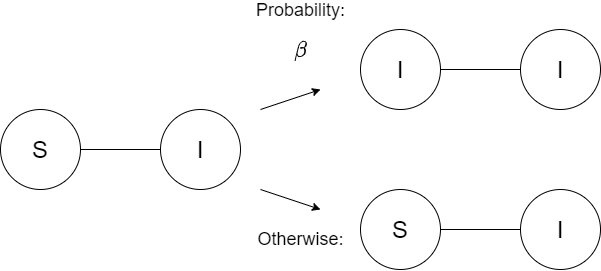

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

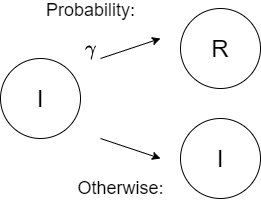

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

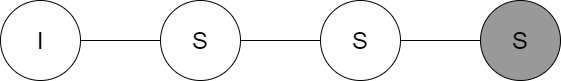

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

To figure out the probability of the right node being infected exactly after 3 time steps we must considered the probability of a susceptable node being infected and also the probability of a currently infected node remaining infected so that they can infect the susceptable neighbors. 

So we should approach this problem by considering the neccessary events that must follow so that the last node on the right is infected. 


Self note: the only events that can occur in each iterations is if a node is infected or if a susceptible node is connected to N infected node

```
For each round I am going to write the events that must happen,  
round0 = P(Node0 remains infected) * P(Node1 gets infected)
round1 = P(Node1 remains infected) * P(Node2 gets infected)
round2 = P(Node2 remains infected) * P(Node3 gets infected)
```
We then multiply the probabilities of these events because they all must happen

P(Node3GetsInfected) = $\gamma$ * $\beta$ * $\gamma$ * $\beta$ * $\gamma$ * $\beta$ * $\gamma$  = $\beta^3$ $\gamma^3$

Likewise for finding the probability of the leftmost node remaining infected after 3 time stamps is equal to.
<br>
P(Node1 Infected | 3 rounds) = $\gamma$ * $\gamma$ * $\gamma$ = $\gamma^3$


**Part B**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

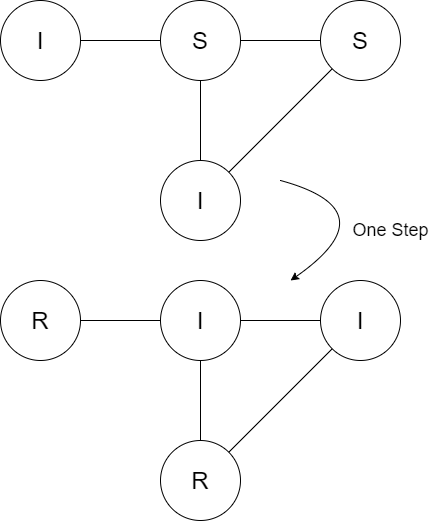

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

The way we approach similarly to how we solved part A. Since we are considering one step to get to that second graph state we must figure out the probability of the following events happening:

```
    Note: S1 is the center node, S2 is the adjacent susceptible node
          I1 is the top left infected node, I2 is the infected node on the bottom of the graph
``` 
<br><br> 
    P(S1 getting infected) = $\beta$ + $\beta$  (2 adjacent infected nodes) 
    <br>
    P(S2 getting infected) = $\beta$  <br>
    P(I1 recovering) = $\gamma$ <br>
    P(I2 recovering) = $\gamma$ <br>
    
```
    Now we multiply the probability of all of these events together because they must all happen.
```
<br>
    P(Graph2) = 2$\beta$  * $\beta$  * $\gamma$ * $\gamma$

$$P(Graph2) = 2\beta * \beta * 2\gamma$$



### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

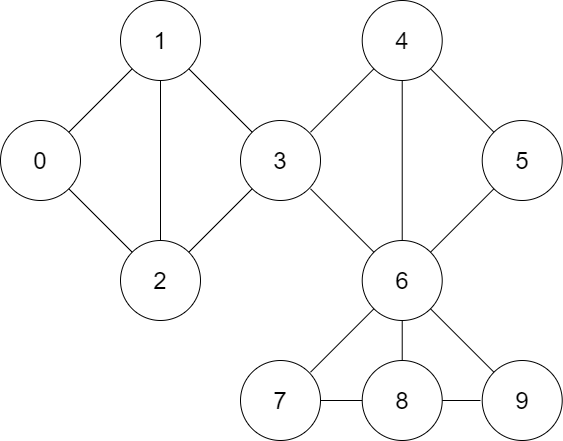

For your convenience, one way to represent this graph as a dictionary of neighbors is listed below.

`nodes` holds the 10 vertices, labelled by their indexes 0 through 9.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [1433]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], 
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}

#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2]
Node #  1  has neighbors of  [0, 2, 3]
Node #  2  has neighbors of  [0, 1, 3]
Node #  3  has neighbors of  [1, 2, 4, 6]
Node #  4  has neighbors of  [3, 5, 6]
Node #  5  has neighbors of  [4, 6]
Node #  6  has neighbors of  [3, 4, 5, 7, 8, 9]
Node #  7  has neighbors of  [6, 8]
Node #  8  has neighbors of  [6, 7, 9]
Node #  9  has neighbors of  [6, 8]


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list of length 10 of the state of each vertex, e.g. [S,S,S,I,I,S,S,S,S,I].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.

To actually implement this model, you may want to create a list of `edges` rather than just neighbors, because one way to implement one step 1 of the model is to loop over all edges.  Note that each edge should appear exactly once in this loop.


In [1434]:
# beta is p(getting infected)
# gamma is p(infected node recovering)
# should only have to perform an computation or updating of the state array
#    first go through the nodes that are infected and try to infect its susceptible neighbors
#    if we are on node that was previously infected => find probability it recovers at the end of the round
# 'intialStates' array indexes correspond directly to what node the are 
def SIR_step(initial_state, gamma, beta):
    new_state = initial_state.copy()     # python is pass by reference
    indexesOfOriginallyInfected = []
    # loop through initialStateArray and look at the nodes that are initially infected
    for i in range(len(initial_state)):
        nodeState = initial_state[i]
        
        # if we find node thats infected, try to infect its neighbors
        if nodeState == 'I':
            indexesOfOriginallyInfected.append(i)   # keep track that it was originally infected
            nodeNeighbors = neighbors[i]            # grab all of its neigbors
            for j in range(len(nodeNeighbors)):
                infected = False
                currentNeighbor = nodeNeighbors[j]
                if initial_state[currentNeighbor] == 'S':
                    pBeta = beta * 100
                    out = float(np.random.randint(100))
                    if out < pBeta:
                        infected = True
                    if infected == True:
                        new_state[currentNeighbor] = 'I'

            
    # loop through and try to recover the previously infected
    #print(indexesOfOriginallyInfected)
    for previouslyInfected in indexesOfOriginallyInfected:
        pGamma = gamma * 100
        out = float(np.random.randint(100))
        if out < pGamma:
            new_state[previouslyInfected] = 'R'
    
    return(new_state)

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [1435]:
states=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
# if there are no I nodes then the state given of the graph should remain the same
case1 = SIR_step(states, 0.0, 0.0)
assert(states == case1)

# if there are I nodes but infection rate is 0 then, we should see more recoveries and no new infections 
states2=['S', 'S', 'S', 'R', 'R', 'S', 'R', 'S', 'S', 'S']
case2 = SIR_step(states2, 0.0, 0.0)
assert(states2 == case2)


# seeing if recovery is working properly
states3=['I', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']
assert(SIR_step(states3, 1.0, 0.0) == ['R', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'])


# seeing if recovery and infection is working properly
states4=['I', 'S', 'S', 'S', 'I', 'S', 'S', 'S', 'S', 'S'] # 1 and 2 should become infected 
assert(SIR_step(states4, 1.0, 1.0) == ['R', 'I', 'I', 'I', 'R', 'I', 'I', 'S', 'S', 'S'])

In [1436]:
state = ['S', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']
case = SIR_step(state,0.0,1.0)
casey = SIR_step(case,0.0,1.0)
print(case)

['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']


Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is given by:

`states=[S, S, S, I, I, S, I, S, S, S]`

so nodes labelled 3, 4,  and 6 are infected.  


**Part D:**
Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  At each step, you should save the current state of each node (you may want to create a data frame to hold them, like `df_per_run`).  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Repeat this experiment 100 times (so you'll have 100 instances of 500 time steps) under 3 different sets of values of the constants $\gamma$ and $\beta$.  You'll want another data frame to save some aggregate descriptors of each run, like `df_overall`.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.1.
* Second, when $\beta=0.2$ and $\gamma=0.05$.
* Finally, when $\beta=0.05$ and $\gamma=0.2$.

For each, you'll want to save the time step (if any) at which the infection ends and the time spend infected for each node.

In [1437]:
#recommended per_run setup.  Put this in a loop/function:
df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
df_per_run.loc[0,:]=['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']
df_per_run.head()

#extract the following: time step at which infection ended, time spent infected for each node.
#one idea: save in new df:
# df_overall= #up to you!


# This is how you will create a big dataframe found on pandas library
#frames = [df1, df2, df3]
#result = pd.concat(frames)

,0,1,2,3,4,5,6,7,8,9
0,S,S,S,I,I,S,I,S,S,S


In [1438]:
def simulate(initialState,gamma,beta):
    Allframes = []   # array of all 100 data frames
    AllTimeFrames = [] # array of all 100 data
    flag = False  # if true then don't grab next time stamp
    NoMoreInfectionTimes = []  # array that holds times when we encountered no more infections
    print("Simulating...")
    for i in range(100): #this needs to be 100  , amount of Dataframes to create
        df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
        df_overall_run=pd.DataFrame(data=None, columns=np.array(range(10)))  # store time they got infected
        
        state = initialState
        prevState = state
        for j in range(500): #this needs to be 500 , amount of SIR steps
            
            # logging the current iterations change 
            newstate = SIR_step(state, gamma, beta)
            df_per_run.loc[j,:]=newstate
            prevState = state
            state = newstate
            
            # logging the time where we encountered no more infections
            noMoreInfections = True  # change when we encounter row that has no more infections
            for k in range(10):
                if state[k] == 'I':
                    noMoreInfections = False
            if noMoreInfections == True and flag == False:
                flag = True
                NoMoreInfectionTimes.append(j)
                
            
            
            # log the current states information, go back and account for inital state? 
            # sum columns at the end to determine the infection times for each node 
            infectionTimes = []
            for i in range(10):
                if state[i] == 'I':
                    infectionTimes.append(1)   
                elif state[i] == 'R' and prevState[i] != 'R':
                    infectionTimes.append(1)  
                else:
                    infectionTimes.append(0)                
            
            
            df_overall_run.loc[j,:] = infectionTimes
            
            # computing the average time spent for each node
        
        flag = False    
        Allframes.append(df_per_run)
        AllTimeFrames.append(df_overall_run)
            
    # concactonate all the frames 
    concatAllFrames = pd.concat(Allframes)
    concatAllTimeFrames = pd.concat(AllTimeFrames)
    print("finished simulating 100 dataframes.")
    return concatAllFrames, concatAllTimeFrames, NoMoreInfectionTimes

In [1439]:
initialState = ['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S']

## Simulation One

In [1440]:
SimulationOne = simulate(initialState, 0.1, 0.1)

Simulating...
finished simulating 100 dataframes.


In [1459]:
SimulationResults = SimulationOne[0]  # this is a dataframe
SimulationResults.head()

,0,1,2,3,4,5,6,7,8,9
0,S,S,S,I,I,S,I,S,S,S
1,S,S,S,I,I,S,I,I,S,S
2,S,S,S,I,I,S,I,I,I,S
3,S,S,S,I,R,I,I,I,I,S
4,S,I,S,I,R,I,I,I,I,I


In [1442]:
SimulationTimeResults = SimulationOne[1]  # this is a dataframe
SimulationTimeResults.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [1443]:
SimulationTimeResultsZeroEncounters = SimulationOne[2]

## Simulatation Two

In [1461]:
SimulationTwo = simulate(initialState, 0.05, 0.05)

Simulating...
finished simulating 100 dataframes.


In [1462]:
SimulationTwoResults = SimulationTwo[0]   # this is a dataframe
SimulationTwoResults.head()

,0,1,2,3,4,5,6,7,8,9
0,S,S,S,I,I,S,I,S,S,S
1,S,S,S,I,I,S,I,S,S,S
2,S,S,I,I,I,I,I,S,S,S
3,S,I,I,I,I,I,I,S,S,S
4,S,I,I,I,I,I,I,S,S,S


In [1446]:
SimulationTwoTimeResults = SimulationTwo[1]   # this is a dataframe
SimulationTwoTimeResults.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1447]:
SimulationTwoTimeResultsZeroEncounters = SimulationTwo[2]

## Simulation Three

In [1448]:
SimulationThree = simulate(initialState, 0.05, 0.2)

Simulating...
finished simulating 100 dataframes.


In [1449]:
SimulationThreeResults = SimulationThree[0]   # this is a dataframe
SimulationResults.head()

,0,1,2,3,4,5,6,7,8,9
0,S,S,S,I,I,S,I,S,S,S
1,S,S,S,I,I,S,I,I,S,S
2,S,S,S,I,I,S,I,I,I,S
3,S,S,S,I,R,I,I,I,I,S
4,S,I,S,I,R,I,I,I,I,I


In [1450]:
SimulationThreeTimeResults = SimulationThree[1]   # this is a dataframe
SimulationThreeTimeResults.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [1451]:
SimulationThreeTimeResultsZeroEncounters = SimulationThree[2]

**Part E:**

For each one of those 3 sets of experiments, report what proportion of the time was node 0 *never* infected?


In [1452]:
def computeRatio(givenDf, x):  # takes in dataframe that holds the time infected, and node we want to inspect
    TimeNodeZeroInfected = givenDf[x].sum()
    return ((len(givenDf) - TimeNodeZeroInfected) / len(givenDf)) * 100

    
sim1Ratio = computeRatio(SimulationTimeResults, 0) # gamma = 0.1 beta = 0.1
sim2Ratio = computeRatio(SimulationTwoTimeResults, 0) # gamma = 0.05 beta = 0.05
sim3Ratio = computeRatio(SimulationThreeTimeResults, 0) # gamma = 0.05 beta = 0.2

In [1453]:
#recommended output style:
def printRate(ratio,beta,gamma):
    print('For beta=',beta,' and gamma=',gamma,' observed node zero never infected', ratio  ,'proportion of the time')
    
printRate(sim1Ratio, 0.1, 0.1)
printRate(sim2Ratio, 0.05, 0.05)
printRate(sim3Ratio, 0.05, 0.2)

For beta= 0.1  and gamma= 0.1  observed node zero never infected 99.142 proportion of the time
For beta= 0.05  and gamma= 0.05  observed node zero never infected 98.316 proportion of the time
For beta= 0.05  and gamma= 0.2  observed node zero never infected 95.904 proportion of the time


** Part F: **

Was there a time step after which no nodes were infected?  If so, when did this happen?  Make a three vertically-aligned histograms of when the infection disappeared, including instances where it was still present at time 500 as `time=501`.

**note:** I was unsure with the wording of the question so I am graphing the exact times for all simulations where we encounter the first state where we don't have any more infected nodes along with the remainder of time steps.

green: gamma = 0.1 beta = 0.1
yellow: gamma = 0.05 beta = 0.05
red: gamma = 0.05 beta = 0.02


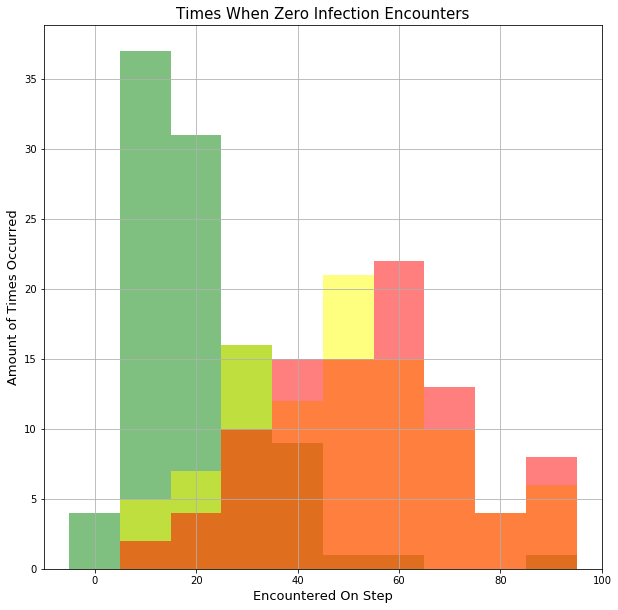

In [1465]:
fig, ax = plt.subplots(figsize=(10,10))

n, bins, patches = plt.hist(pd.Series(SimulationTimeResultsZeroEncounters), bins=np.arange(0, 110, 10), align='left',color = "green", alpha = 0.5)
n, bins, patches = plt.hist(pd.Series(SimulationTwoTimeResultsZeroEncounters), bins=np.arange(0, 110, 10), align='left',color = "yellow", alpha = 0.5)
n, bins, patches = plt.hist(pd.Series(SimulationThreeTimeResultsZeroEncounters), bins=np.arange(0, 110, 10), align='left',color = "red", alpha =  0.5)


ax.set_title("Times When Zero Infection Encounters", fontsize = 15)
ax.set_ylabel("Amount of Times Occurred", fontsize = 13)
ax.set_xlabel("Encountered On Step", fontsize = 13)
ax.grid(alpha=1)

print("green: gamma = 0.1 beta = 0.1")
print("yellow: gamma = 0.05 beta = 0.05")
print("red: gamma = 0.05 beta = 0.02")

** Part G: **

Create a line graph with three lines showing the average number of time steps spent infected for each node.  The lines will have an x-axis of the index of each node and a y-axis of the average number of time steps spent infected.  There should be one line per pair of $\beta, \gamma$ values.

Sanity check: for the 3 nodes that start as infected, explain approximately what should this number be in terms of the distributions discussed in the class.

In [1455]:
# first computing the average time spent infected for each node 
sim1Ratio = computeRatio(SimulationTimeResults, 0) # gamma = 0.1 beta = 0.1
sim2Ratio = computeRatio(SimulationTwoTimeResults, 0) # gamma = 0.05 beta = 0.05
sim3Ratio = computeRatio(SimulationThreeTimeResults, 0) # gamma = 0.05 beta = 0.2

In [1466]:
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
seven = []
eight = []
nine = []

# return the number of time steps spent infected 
def computeRatio2(givenDf, x):  # takes in dataframe that holds the time infected, and node we want to inspect
    timeSpentInfected = givenDf[x].sum() / 100
    return timeSpentInfected

# takes in dataframe for time results , and node we want to compute 
def computeNodeTimeSpent():   
    
    zero.append(computeRatio2(SimulationTimeResults,0))
    zero.append(computeRatio2(SimulationTwoTimeResults,0))
    zero.append(computeRatio2(SimulationThreeTimeResults,0))
    
    one.append(computeRatio2(SimulationTimeResults,1))
    one.append(computeRatio2(SimulationTwoTimeResults,1))
    one.append(computeRatio2(SimulationThreeTimeResults,1))
    
    two.append(computeRatio2(SimulationTimeResults,2))
    two.append(computeRatio2(SimulationTwoTimeResults,2))
    two.append(computeRatio2(SimulationThreeTimeResults,2))
    
    three.append(computeRatio2(SimulationTimeResults,3))
    three.append(computeRatio2(SimulationTwoTimeResults,3))
    three.append(computeRatio2(SimulationThreeTimeResults,3))
    
    four.append(computeRatio2(SimulationTimeResults,4))
    four.append(computeRatio2(SimulationTwoTimeResults,4))
    four.append(computeRatio2(SimulationThreeTimeResults,4))
    
    five.append(computeRatio2(SimulationTimeResults,5))
    five.append(computeRatio2(SimulationTwoTimeResults,5))
    five.append(computeRatio2(SimulationThreeTimeResults,5))
    
    six.append(computeRatio2(SimulationTimeResults,6))
    six.append(computeRatio2(SimulationTwoTimeResults,6))
    six.append(computeRatio2(SimulationThreeTimeResults,6))
    
    seven.append(computeRatio2(SimulationTimeResults,7))
    seven.append(computeRatio2(SimulationTwoTimeResults,7))
    seven.append(computeRatio2(SimulationThreeTimeResults,7))
    
    eight.append(computeRatio2(SimulationTimeResults,8))
    eight.append(computeRatio2(SimulationTwoTimeResults,8))
    eight.append(computeRatio2(SimulationThreeTimeResults,8))
    
    nine.append(computeRatio2(SimulationTimeResults,9))
    nine.append(computeRatio2(SimulationTwoTimeResults,9))
    nine.append(computeRatio2(SimulationThreeTimeResults,9))

    
computeNodeTimeSpent()

sim1Graph = []
sim2Graph = []
sim3Graph = []

sim1Graph.append(zero[0])
sim1Graph.append(one[0])
sim1Graph.append(two[0])
sim1Graph.append(three[0])
sim1Graph.append(four[0])
sim1Graph.append(five[0])
sim1Graph.append(six[0])
sim1Graph.append(seven[0])
sim1Graph.append(eight[0])
sim1Graph.append(nine[0])

sim2Graph.append(zero[1])
sim2Graph.append(one[1])
sim2Graph.append(three[1])
sim2Graph.append(four[1])
sim2Graph.append(five[1])
sim2Graph.append(six[1])
sim2Graph.append(seven[1])
sim2Graph.append(eight[1])
sim2Graph.append(nine[1])

sim3Graph.append(zero[2])
sim3Graph.append(one[2])
sim3Graph.append(two[2])
sim3Graph.append(three[2])
sim3Graph.append(four[2])
sim3Graph.append(five[2])
sim3Graph.append(six[2])
sim3Graph.append(seven[2])
sim3Graph.append(eight[2])
sim3Graph.append(nine[2])

green: gamma = 0.1 beta = 0.1
red: gamma = 0.05 beta = 0.05
blue: gamma = 0.05 beta = 0.2


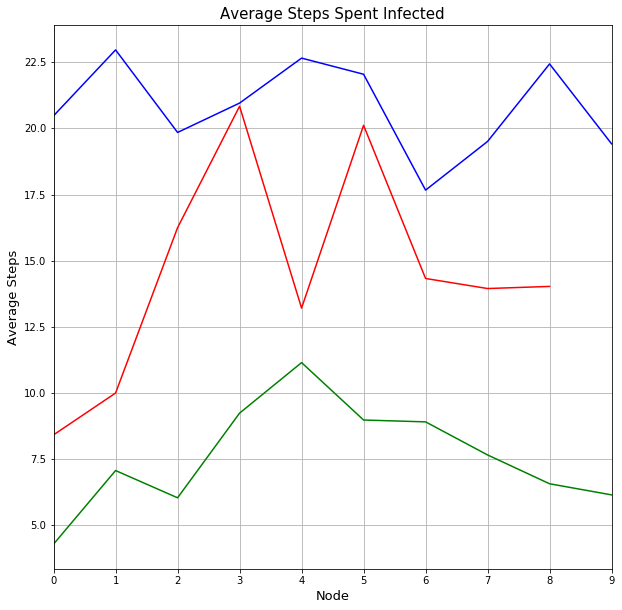

In [1467]:
# plotting the graph 
fig, ax = plt.subplots(figsize=(10,10))
pd.Series(sim1Graph).plot.line(color ="green")
pd.Series(sim2Graph).plot.line(color ="red")
pd.Series(sim3Graph).plot.line(color ="blue")

ax.set_title("Average Steps Spent Infected", fontsize = 15)
ax.set_ylabel("Average Steps", fontsize = 13)
ax.set_xlabel("Node", fontsize = 13)
ax.grid(alpha=1)

print("green: gamma = 0.1 beta = 0.1")
print("red: gamma = 0.05 beta = 0.05")
print("blue: gamma = 0.05 beta = 0.2")

In terms of distributions we should expect the initially infected nodes to be the center of the dataset 

**Part H: **

Comment on anything you found interesting or unusual.

**Initially, I predicted that Node 6 was the node that would spend the most time being infected because it was surrounded by the most nodes, but based on my simulation, node 4 spent the most time being infected**

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check our course offerings by Aaron Clauset and Dan Larremore for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>